In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ipl_ball_by_ball_data.csv')
df.head(2)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.batting_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Deccan Chargers', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings'],
      dtype=object)

In [4]:
df[df.batting_team=='Chennai Super Kings']['striker'].unique()

array(['MEK Hussey', 'JDP Oram', 'SK Raina', 'S Badrinath', 'ML Hayden',
       'PA Patel', 'MS Dhoni', 'JA Morkel', 'S Vidyut', 'SP Fleming',
       'MS Gony', 'Joginder Sharma', 'M Muralitharan', 'M Ntini',
       'S Anirudha', 'CK Kapugedera', 'L Balaji', 'A Mukund',
       'T Thushara', 'A Flintoff', 'SB Jakati', 'M Vijay', 'GJ Bailey',
       'R Ashwin', 'S Tyagi', 'JM Kemp', 'KB Arun Karthik',
       'DE Bollinger', 'SB Styris', 'S Randiv', 'WP Saha', 'DJ Bravo',
       'F du Plessis', 'RA Jadeja', 'KMDN Kulasekara', 'AS Rajpoot',
       'B Laughlin', 'CH Morris', 'MM Sharma', 'DR Smith', 'BB McCullum',
       'M Manhas', 'DJ Hussey', 'A Nehra', 'RG More', 'P Negi',
       'KM Jadhav', 'AT Rayudu', 'SR Watson', 'MA Wood', 'Imran Tahir',
       'DL Chahar', 'Harbhajan Singh', 'SW Billings', 'DR Shorey',
       'SN Thakur', 'MJ Santner', 'SM Curran', 'RD Gaikwad',
       'N Jagadeesan', 'MM Ali'], dtype=object)

## MS Dhoni since 2019

In [21]:
#Stats for MS Dhoni since the 2019 season
msd = df[(df.striker=='MS Dhoni') & (df.season>=2019)]

In [19]:
msd.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [25]:
print('Total Runs scored by MSD in last three seasons: ',sum(msd.runs_off_bat))

Total Runs scored by MSD in last three seasons:  653


In [26]:
#this dataframe gives his runs and strike rate season by season since 2019
msd_df = pd.DataFrame()
msd_df['runs']=msd.groupby(['season']).runs_off_bat.sum()
msd_df['balls'] = msd.groupby(['season']).size()
msd_df['strike_rate'] = (msd_df['runs']/msd_df['balls'])*100
msd_df.reset_index(level=0, inplace=True)

In [27]:
msd_df

,season,runs,balls,strike_rate
0,2019,416,317,131.230284
1,2020,200,175,114.285714
2,2021,37,32,115.625000


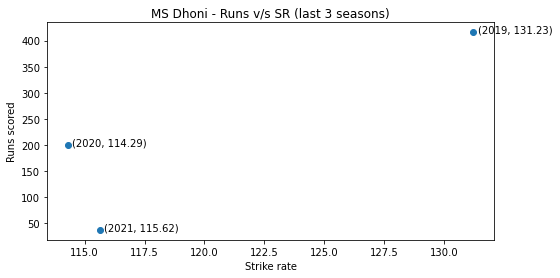

In [34]:
plt.figure(figsize = (8, 4))
plt.title('MS Dhoni - Runs v/s SR (last 3 seasons)')
plt.scatter(msd_df['strike_rate'],msd_df['runs'])
for i in range(msd_df.shape[0]):
    plt.text(x=msd_df.strike_rate[i]+0.2,y=msd_df.runs[i]-1,s=(msd_df.season[i],round(msd_df.strike_rate[i],ndigits=2)))
plt.xlabel('Strike rate')
plt.ylabel('Runs scored')
plt.show()

#### This shows that his form was not that great in the last two seasons. Let's compare him with other players.

## Comparative analysis of players since 2019

In [17]:
#all the data since 2019
df19 = df[df.season>=2019]

In [40]:
#this dataframe gives player wise runs, runs per innings(rpi), balls,innings and strike rate season by season since 2019
runs_df = pd.DataFrame()
runs_df['runs']=df19.groupby(['striker']).runs_off_bat.sum()
runs_df['balls']=df19.groupby(['striker']).size()
runs_df['innings']=df19.groupby("striker").agg({"match_id": "nunique"})
runs_df['rpi'] = round(runs_df['runs']/runs_df['innings'],ndigits=2)
runs_df['strike_rate'] = round(100*(runs_df.runs/runs_df.balls),ndigits=2)
runs_df.reset_index(level=0, inplace=True)
runs_df

,striker,runs,balls,innings,rpi,strike_rate
0,A Mishra,21,26,4,5.25,80.77
1,A Nortje,7,6,3,2.33,116.67
2,AB de Villiers,1109,719,33,33.61,154.24
3,AD Nath,61,58,5,12.20,105.17
4,AD Russell,794,468,29,27.38,169.66
...,...,...,...,...,...,...
196,Y Prithvi Raj,0,1,1,0.00,0.00
197,YBK Jaiswal,106,94,6,17.67,112.77
198,YK Pathan,40,47,7,5.71,85.11
199,YS Chahal,15,42,6,2.50,35.71


In [41]:
#filter out players with min 10 innings and runs above 300 in last three seasons
runs_df = runs_df[(runs_df.innings>=10) & (runs_df.runs>=300)]
runs_df = runs_df.sort_values('rpi',ascending=False).head(40)
runs_df=runs_df.reset_index(drop=True)
runs_df

,striker,runs,balls,innings,rpi,strike_rate
0,KL Rahul,1600,1225,35,45.71,130.61
1,DA Warner,1435,1104,34,42.21,129.98
2,JM Bairstow,1038,755,28,37.07,137.48
3,S Dhawan,1519,1115,41,37.05,136.23
4,F du Plessis,1165,879,32,36.41,132.54
5,CH Gayle,963,701,28,34.39,137.38
6,AB de Villiers,1109,719,33,33.61,154.24
7,JC Buttler,893,619,27,33.07,144.26
8,MA Agarwal,1024,713,31,33.03,143.62
9,CA Lynn,454,332,14,32.43,136.75


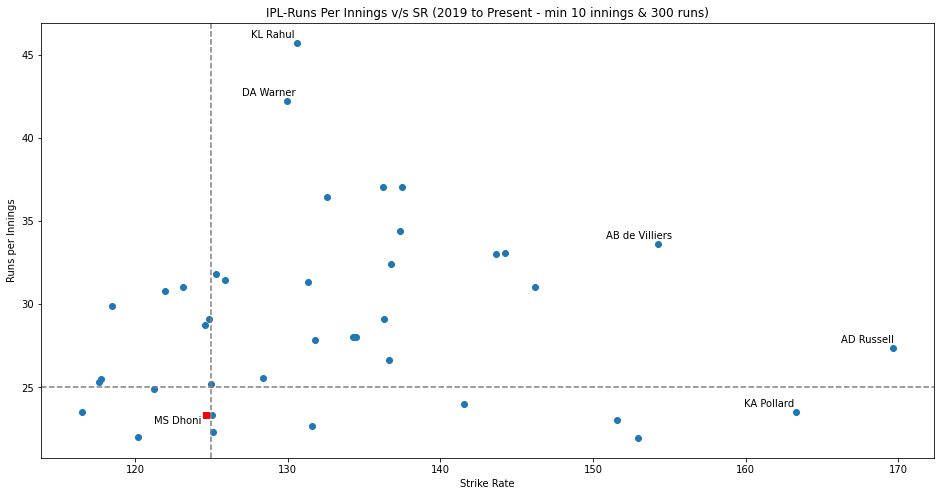

In [43]:
plt.figure(figsize = (16, 8))
plt.title('IPL-Runs Per Innings v/s SR (2019 to Present - min 10 innings & 300 runs)')
plt.scatter(runs_df['strike_rate'],runs_df['rpi'])
plt.scatter(runs_df['strike_rate'][34], runs_df['rpi'][34], color="red",marker='s')
for i in range(runs_df.shape[0]):
    if runs_df.striker[i]=='MS Dhoni':
        plt.text(x=runs_df.strike_rate[i]-3.4,y=runs_df.rpi[i]-.5,s=runs_df.striker[i])
    elif runs_df.strike_rate[i]>153:
         plt.text(x=runs_df.strike_rate[i]-3.4,y=runs_df.rpi[i]+0.3,s=runs_df.striker[i])
    elif runs_df.rpi[i]>40:
         plt.text(x=runs_df.strike_rate[i]-3,y=runs_df.rpi[i]+0.3,s=runs_df.striker[i])
plt.xlabel('Strike Rate')
plt.ylabel('Runs per Innings')
plt.axvline(125, ls = '--', color = 'grey')
plt.axhline(25, ls = '--', color = 'grey')
plt.show()

#### As it is visible that his numbers are almost towards the end of the list and his SR is below 125 and RPI (runs per innings) is below 25. But apart from being the greatest behind the stumps, the role that he plays for his team is that of a finisher. So let's look at his stats in the last five overs and compare them with other players.

## Death over analysis for last three seasons (since 2019)

In [45]:
#get data only for overs 16-20 for last three seasons
df1=df[(df.ball>=16) & (df.season>=2019)]

In [46]:
df1.ball.unique()

array([16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 17.1, 17.2, 17.3, 17.4, 17.5,
       19.2, 19.5, 19.4, 19.3, 19.1, 18.7, 18.6, 18.5, 18.4, 18.3, 18.2,
       18.1, 17.6, 19.6, 18.8, 16.7, 17.7, 19.7, 17.8, 19.8, 17.9, 18.9,
       16.8, 19.9, 16.9])

In [49]:
runs_df1=pd.DataFrame()
runs_df1['runs']=df1.groupby(['striker']).runs_off_bat.sum()
runs_df1['balls']=df1.groupby(['striker']).size()
runs_df1['strike_rate'] = round(100*(runs_df1.runs/runs_df1.balls),ndigits=2)
runs_df1 = runs_df1[runs_df1.balls>=75]
runs_df1 = runs_df1.sort_values('strike_rate',ascending=False).head(40)
runs_df1.reset_index(level=0, inplace=True)
runs_df1.head(15)

,striker,runs,balls,strike_rate
0,AB de Villiers,416,182,228.57
1,AD Russell,384,180,213.33
2,V Kohli,178,84,211.90
3,EJG Morgan,173,85,203.53
4,HH Pandya,491,243,202.06
5,KA Pollard,472,238,198.32
6,KD Karthik,240,123,195.12
7,SM Curran,174,92,189.13
8,KL Rahul,244,130,187.69
9,RR Pant,257,137,187.59


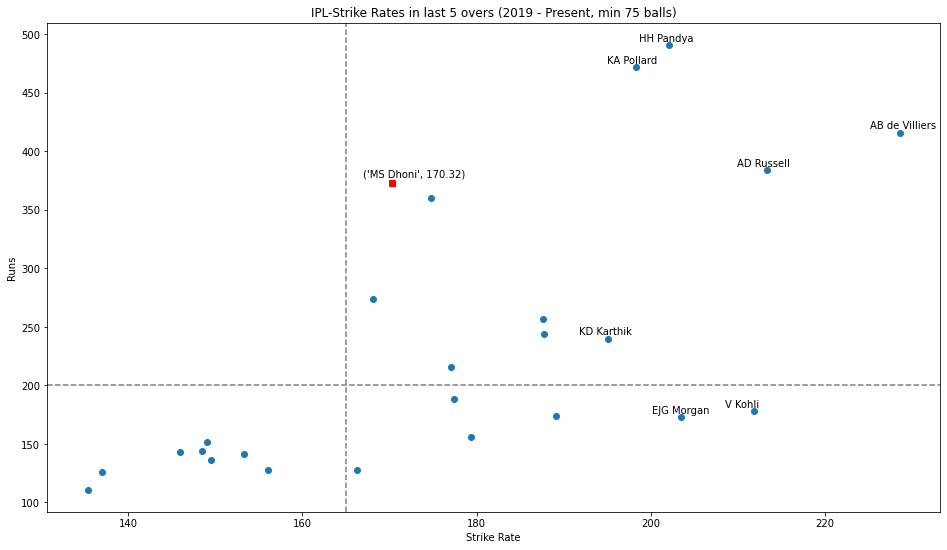

In [52]:
plt.figure(figsize = (16, 9))
plt.title('IPL-Strike Rates in last 5 overs (2019 - Present, min 75 balls)')
plt.scatter(runs_df1['strike_rate'],runs_df1['runs'])
plt.scatter(runs_df1['strike_rate'][14], runs_df1['runs'][14], color="red",marker='s')
for i in range(runs_df1.shape[0]):
    if runs_df1.striker[i]=='MS Dhoni':
        plt.text(x=runs_df1.strike_rate[i]-3.4,y=runs_df1.runs[i]+5,s=(runs_df1.striker[i],runs_df1.strike_rate[i]))
    elif runs_df1.strike_rate[i]>190:
         plt.text(x=runs_df1.strike_rate[i]-3.4,y=runs_df1.runs[i]+3.3,s=runs_df1.striker[i])
plt.xlabel('Strike Rate')
plt.ylabel('Runs')
plt.axvline(165, ls = '--', color = 'grey')
plt.axhline(200, ls = '--', color = 'grey')
plt.show()

#### MS Dhoni has the overall 15th highest SR in death overs since 2019, but players like Morgan, Kohli and Curran have faced less than 100 balls whereas MSD has faced over 200 balls. So that SR is very good. But he had a good 2019 season and he had a horrible last season and this season is only half done. So let's remove the 2019 season from this graph.

## Death over analysis for last one and half seasons (since 2020)

In [54]:
#get data only for overs 16-20 for last two seasons
df2=df[(df.ball>=16) & (df.season>=2020)]

In [58]:
runs_df2=pd.DataFrame()
runs_df2['runs']=df2.groupby(['striker']).runs_off_bat.sum()
runs_df2['balls']=df2.groupby(['striker']).size()
runs_df2['strike_rate'] = round(100*(runs_df2.runs/runs_df2.balls),ndigits=2)
runs_df2 = runs_df2[runs_df2.balls>=50]
runs_df2 = runs_df2.sort_values('strike_rate',ascending=False).head(40)
runs_df2.reset_index(level=0, inplace=True)
runs_df2.head(20)

,striker,runs,balls,strike_rate
0,AB de Villiers,306,136,225.00
1,EJG Morgan,173,85,203.53
2,KA Pollard,315,156,201.92
3,KL Rahul,151,75,201.33
4,SO Hetmyer,138,69,200.00
5,HH Pandya,226,114,198.25
6,RA Jadeja,282,145,194.48
7,V Kohli,106,57,185.96
8,JC Archer,96,52,184.62
9,R Tewatia,195,107,182.24


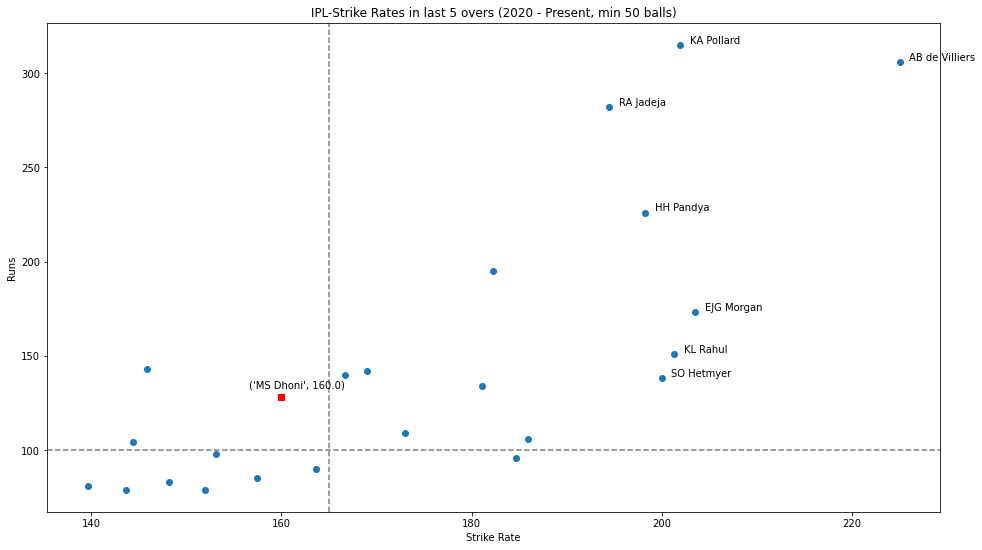

In [61]:
plt.figure(figsize = (16, 9))
plt.title('IPL-Strike Rates in last 5 overs (2020 - Present, min 50 balls)')
plt.scatter(runs_df2['strike_rate'],runs_df2['runs'])
plt.scatter(runs_df2['strike_rate'][15], runs_df2['runs'][15], color="red",marker='s')
for i in range(runs_df2.shape[0]):
    if runs_df2.striker[i]=='MS Dhoni':
        plt.text(x=runs_df2.strike_rate[i]-3.4,y=runs_df2.runs[i]+5,s=(runs_df2.striker[i],runs_df2.strike_rate[i]))
    elif runs_df2.strike_rate[i]>190:
         plt.text(x=runs_df2.strike_rate[i]+1,y=runs_df2.runs[i]+1,s=runs_df2.striker[i])
plt.xlabel('Strike Rate')
plt.ylabel('Runs')
plt.axvline(165, ls = '--', color = 'grey')
plt.axhline(100, ls = '--', color = 'grey')
plt.show()

In [70]:
#his avg strike over the last two seasons
print('MS Dhoni Average Strike Rate over the last two seasons: ',msd_df[msd_df.season>2019].strike_rate.mean())

MS Dhoni Average Strike Rate over the last two seasons:  114.95535714285714


#### Given the fact he had a dismal last season and this season as well he hasn't started well, his strike rate is still the 16th highest among batsmen who have faced  more than 50 balls in the death overs. And look at his avg SR, 115. From that to 160-170 in the last five overs is great. He is just struggling in the middle overs, but he is still managing to accelerate towards the end.